In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib import figure
import csv
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **These functions below are grabbing the data for the csv files** 

In [3]:
songs = []
def get_data(filename):
  with open(filename, "r") as infile:
    csv_reader = csv.reader(infile)
    next(csv_reader)
    data = {}
    for row in csv_reader:
      try:
        accousticness = float(row[1])
        analysis_url = row[2]
        danceability = float(row[3])
        duration_ms = float(row[4])
        energy = float(row[5])
        id = row[6]
        instrumentalness = float(row[7])
        key = int(row[8])
        liveliness = float(row[9])
        loudness = float(row[10])
        mode = int(row[11])
        speechiness = float(row[12])
        tempo = float(row[13])
        time_signature = int(row[14])
        track_href = row[15]
        song_type = row[16]
        uri = row[17]
        valence = float(row[18])
        track_name = row[19]
        artist = row[20]
        data = {"accousticness":accousticness, "analysis_url":analysis_url, "danceability": danceability, "duration_ms": duration_ms,
                "energy": energy, "id": id, "instrumentalness": instrumentalness, "key": key, "liveliness":liveliness, "loudness":loudness,
                "mode":mode, "speechiness": speechiness, "tempo": tempo, "time_signature": time_signature, "track_href": track_href, 
                "song_type": song_type, "uri": uri, "valence": valence, "track_name": track_name, "artist":artist}
        songs.append(data)
      except:
        continue
  return songs

In [4]:
data = get_data("/content/gdrive/My Drive/CX4242 Group Project/tracks_enhanced.csv")

In [5]:
df = pd.DataFrame(data)

## **Used K-Means to cluster the data into 10 clusters and graphed them**

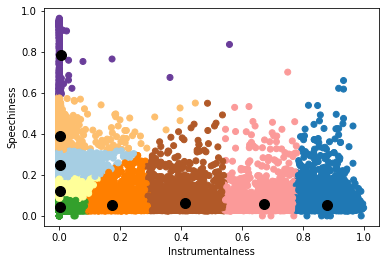

In [8]:
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df[["instrumentalness", "speechiness"]])
plt.scatter(df['instrumentalness'], df['speechiness'], c=pred_y, cmap=plt.cm.Paired)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.xlabel('Instrumentalness')
plt.ylabel('Speechiness')
plt.show()

In [ ]:
df['cluster'] = ''

In [ ]:
for i in range(len(kmeans.labels_)):
  df.iloc[i]["cluster"] = kmeans.labels_[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/CX4242 Group Project/data_with_clusters.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.columns

Index(['Unnamed: 0', 'accousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveliness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'song_type', 'uri', 'valence', 'track_name', 'artist',
       'cluster'],
      dtype='object')

In [ ]:
e = []
for i in range(10):
  info = data[data['cluster'] == i]
  d = {'cluster': i, 'average_acousticness': info['accousticness'].mean(), 'average_danceability': info['danceability'].mean(), 'average_energy': info['energy'].mean(),
       'average_instrumentalness': info['instrumentalness'].mean(), 'average_key': info['key'].mean(), 'average_liveliness': info['liveliness'].mean(), 
       'average_loudness': info['loudness'].mean(), 'average_mode': info['mode'].mean(), 'average_speechiness': info['speechiness'].mean()}
  e.append(d)
analysis = pd.DataFrame(e)

In [ ]:
analysis

,cluster,average_acousticness,average_danceability,average_energy,average_instrumentalness,average_key,average_liveliness,average_loudness,average_mode,average_speechiness
0,0,0.258444,0.563778,0.629572,0.125754,5.260325,0.181515,-8.590993,0.624781,0.051182
1,1,0.303642,0.533860,0.597411,0.721276,5.118217,0.177412,-9.842462,0.610465,0.061169
2,2,0.221631,0.657801,0.656926,0.002911,5.359701,0.228094,-7.396754,0.566458,0.390328
3,3,0.267408,0.574740,0.624831,0.002917,5.176914,0.180507,-7.402515,0.707915,0.043493
4,4,0.257897,0.570788,0.629694,0.301666,5.459684,0.182002,-8.851738,0.604738,0.061607
5,5,0.544585,0.611296,0.586370,0.004023,4.925287,0.437093,-11.633351,0.652299,0.787310
6,6,0.518486,0.469769,0.454791,0.888971,5.068702,0.161136,-13.278176,0.626779,0.053944
7,7,0.172801,0.633220,0.724344,0.002771,5.330589,0.209673,-6.295969,0.588773,0.121740
8,8,0.177810,0.684092,0.698933,0.003175,5.468335,0.216459,-6.501659,0.566512,0.246280
9,9,0.274083,0.555754,0.632464,0.505944,5.224638,0.183912,-8.923139,0.612077,0.060274


In [ ]:
analysis.to_csv('cluster_averages.csv')